# Python for finance

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt

In [4]:
web_data = pd.read_csv(
        'https://datahub.io/core/gold-prices/r/monthly.csv'
)

In [5]:
#import os #important to import when dealing with data
#import urllib #used to grab datasets from the web
#url = 'https://datahub.io/core/gold-prices/r/monthly.csv'
#newpath = os.path.join("data")
#data_path = os.path.join(newpath,"Gold.csv" )
#req = urllib.request.urlretrieve(url, data_path)
#web_data = pd.read_csv(data_path)
#web_data.head()

## Getting Proper Dates:

The data loaded in is that of gold prices throughout the years

Now that we can see the data is loaded in properly we need to check what type of data it holds

In [6]:
web_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


We can see that the date type is an object. That is not as useful to us as a date field, so we need to convert that.

In [5]:
web_data['Date']=pd.to_datetime(web_data['Date'])

In [6]:
web_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    847 non-null    datetime64[ns]
 1   Price   847 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.4 KB


## Plot our time series

<AxesSubplot:xlabel='Date'>

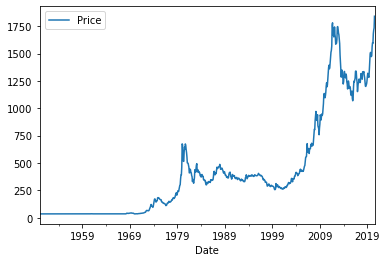

In [12]:
web_data.plot('Date','Price')

# Plot me the data between March, 2009 to March, 2019 

(470.0, 596.0)

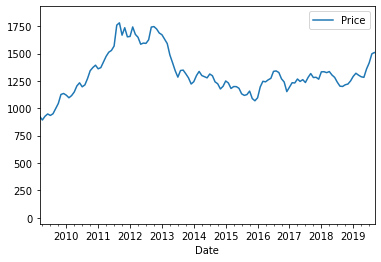

In [14]:
web_data.plot('Date','Price')
plt.xlim(pd.Timestamp('2009-03'), pd.Timestamp('2019-09'))

# Create a new Data Frame with a decade of data and then plot it

In [15]:
web_dataDecade = web_data[(web_data['Date'] > "2000-01") & (web_data['Date'] < "2010-01")]

<AxesSubplot:xlabel='Date'>

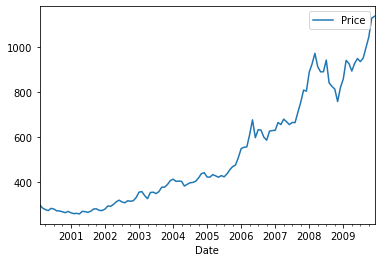

In [17]:
web_dataDecade.plot('Date','Price')

# Find your Decade's mean price vs the overall mean price of Gold

In [20]:
web_dataDecade.Price.mean()

524.5561764705884

In [21]:
web_data.Price.mean()

416.5569055489969

# Plot a simple moving average with a laggard of 30
## When predicted prices one tool used is often a simple moving average it is especially useful for time series data


In [26]:
web_data['SMA']=web_data['Price'].rolling(30).mean()

<AxesSubplot:xlabel='Date'>

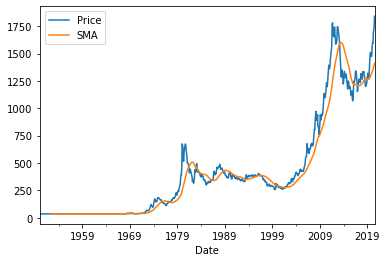

In [27]:
web_data.plot('Date',['Price','SMA'])

# Feel free to play around and re-plot with various SMA

# 

# Now lets try a new set with various exchange rate data against the dollar

In [121]:
url = 'https://datahub.io/core/exchange-rates/r/daily.csv'
newpath = os.path.join("data")
data_path = os.path.join(newpath,"Gold.csv" )
req = urllib.request.urlretrieve(url, data_path)
xchange = pd.read_csv(data_path)
xchange.head()

,Date,Country,Value
0,1971-01-04,Australia,0.8987
1,1971-01-05,Australia,0.8983
2,1971-01-06,Australia,0.8977
3,1971-01-07,Australia,0.8978
4,1971-01-08,Australia,0.8990


# Repeat the same process of  converting date to datetime

In [31]:
xchange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226533 entries, 0 to 226532
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Date     226533 non-null  object 
 1   Country  226533 non-null  object 
 2   Value    217806 non-null  float64
dtypes: float64(1), object(2)
memory usage: 5.2+ MB


In [123]:
xchange['Date']=pd.to_datetime(xchange['Date'])

In [124]:
xchange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226533 entries, 0 to 226532
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Date     226533 non-null  datetime64[ns]
 1   Country  226533 non-null  object        
 2   Value    217806 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.2+ MB


# When looking as the head, you may notice repeating values in the column for country, maybe its best to pivot this data

In [129]:
xchange2 =xchange.pivot(index='Date',columns='Country',values='Value')

In [131]:
xchange2.info()
#or get rid of .info() to just see all data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12240 entries, 1971-01-04 to 2017-12-01
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Australia       11768 non-null  float64
 1   Brazil          5758 non-null   float64
 2   Canada          11781 non-null  float64
 3   China           9215 non-null   float64
 4   Denmark         11774 non-null  float64
 5   Euro            4754 non-null   float64
 6   Hong Kong       9275 non-null   float64
 7   India           11267 non-null  float64
 8   Japan           11769 non-null  float64
 9   Malaysia        11753 non-null  float64
 10  Mexico          6043 non-null   float64
 11  New Zealand     11759 non-null  float64
 12  Norway          11774 non-null  float64
 13  Singapore       9274 non-null   float64
 14  South Africa    12123 non-null  float64
 15  South Korea     9161 non-null   float64
 16  Sweden          11774 non-null  float64
 17  Switzerland   

In [126]:
xchange2 = pd.DataFrame(xchange2)

# Something to note, pivoted object is no longer a data frame and needs to be converted back

# Lets create 2 new dataframes to plot the exchange rate data of two countries of your choice, take one from the pivot table an another from the original data frame

In [127]:
CAD = xchange2['Canada']

In [128]:
AUD = xchange[xchange.Country=='Australia']

In [52]:
AUD

,Date,Country,Value
0,1971-01-04,Australia,0.8987
1,1971-01-05,Australia,0.8983
2,1971-01-06,Australia,0.8977
3,1971-01-07,Australia,0.8978
4,1971-01-08,Australia,0.8990
...,...,...,...
12235,2017-11-27,Australia,1.3149
12236,2017-11-28,Australia,1.3129
12237,2017-11-29,Australia,1.3207
12238,2017-11-30,Australia,1.3207


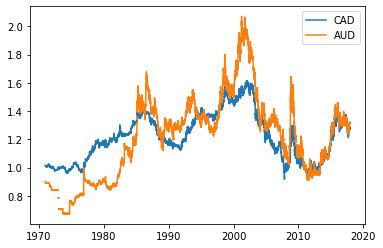

In [66]:
plt.plot(CAD,label='CAD')
plt.plot(AUD['Date'],AUD['Value'],label='AUD')
plt.legend()
plt.show()

# If the chart has rising values that does not mean the currency is appreciating but depreciated. The value of 1 dollar has become X in the currency you chose

# Now, for once last item, lets create a decade of timeseries data again

In [67]:
AUDDecade = AUD[(AUD['Date'] > "2000-01-01") & (AUD['Date'] < "2010-01-01")]

# Plot as usual

<AxesSubplot:xlabel='Date'>

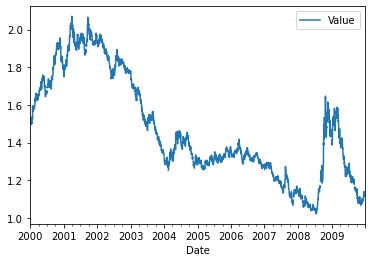

In [95]:
AUDDecade.plot('Date','Value')


# The data should still be in DateTime and I am curious as to which weekday has the highest average value. Luckily we can find this out

In [108]:
#find the weekdays
print(AUDDecade['Date'].dt.day_name())

7565        Monday
7566       Tuesday
7567     Wednesday
7568      Thursday
7569        Friday
           ...    
10169       Friday
10170       Monday
10171      Tuesday
10172    Wednesday
10173     Thursday
Name: Date, Length: 2609, dtype: object


In [109]:
#create a column for each Date's corresponding weekday
AUDDecade['Day'] = (AUDDecade['Date'].dt.day_name())

<ipython-input-109-bbcdde182662>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AUDDecade['Day']= (AUDDecade['Date'].dt.day_name())


In [110]:
AUDDecade

,Date,Country,Value,Day
7565,2000-01-03,Australia,1.5172,Monday
7566,2000-01-04,Australia,1.5239,Tuesday
7567,2000-01-05,Australia,1.5267,Wednesday
7568,2000-01-06,Australia,1.5291,Thursday
7569,2000-01-07,Australia,1.5272,Friday
...,...,...,...,...
10169,2009-12-25,Australia,NaN,Friday
10170,2009-12-28,Australia,1.1268,Monday
10171,2009-12-29,Australia,1.1150,Tuesday
10172,2009-12-30,Australia,1.1179,Wednesday


# Pandas has a groupby function to sort each value by similar grouping, in our case, weekdays

# Group some weekdays and do some math or function calls to find the means 

In [118]:
x = AUDDecade.groupby(['Day'])

In [120]:
print(x.mean())

              Value
Day                
Friday     1.473326
Monday     1.469303
Thursday   1.470489
Tuesday    1.469807
Wednesday  1.470773
